<a href="https://colab.research.google.com/github/shuvamadhikary6388-lang/ML/blob/main/ML_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

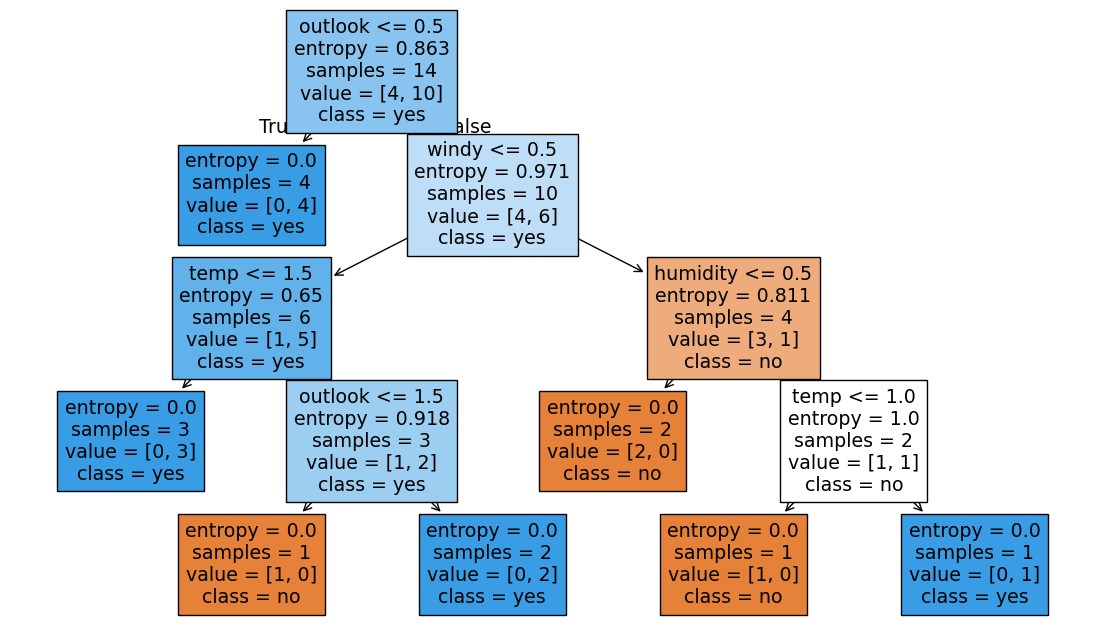

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = {
    "outlook": ["rainy","rainy","overcast","sunny","sunny","sunny",
                "overcast","rainy","rainy","sunny","rainy","overcast",
                "overcast","sunny"],
    "temp": ["hot","hot","hot","mild","cool","cool",
             "cool","mild","cool","mild","mild","mild",
             "hot","mild"],
    "humidity": ["high","high","high","high","normal","normal",
                 "normal","high","normal","normal","normal","high",
                 "normal","high"],
    "windy": ["FALSE","TRUE","FALSE","FALSE","FALSE","TRUE",
              "TRUE","FALSE","FALSE","FALSE","TRUE","TRUE",
              "FALSE","TRUE"],
    "play_golf": ["yes","no","yes","yes","yes","no",
                  "yes","no","yes","yes","yes","yes",
                  "yes","no"]
}

df = pd.DataFrame(data)

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

X = df.drop("play_golf", axis=1)
y = df["play_golf"]

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

plt.figure(figsize=(14, 8))
plot_tree(model,feature_names=X.columns,class_names=["no", "yes"],filled=True)
plt.show()

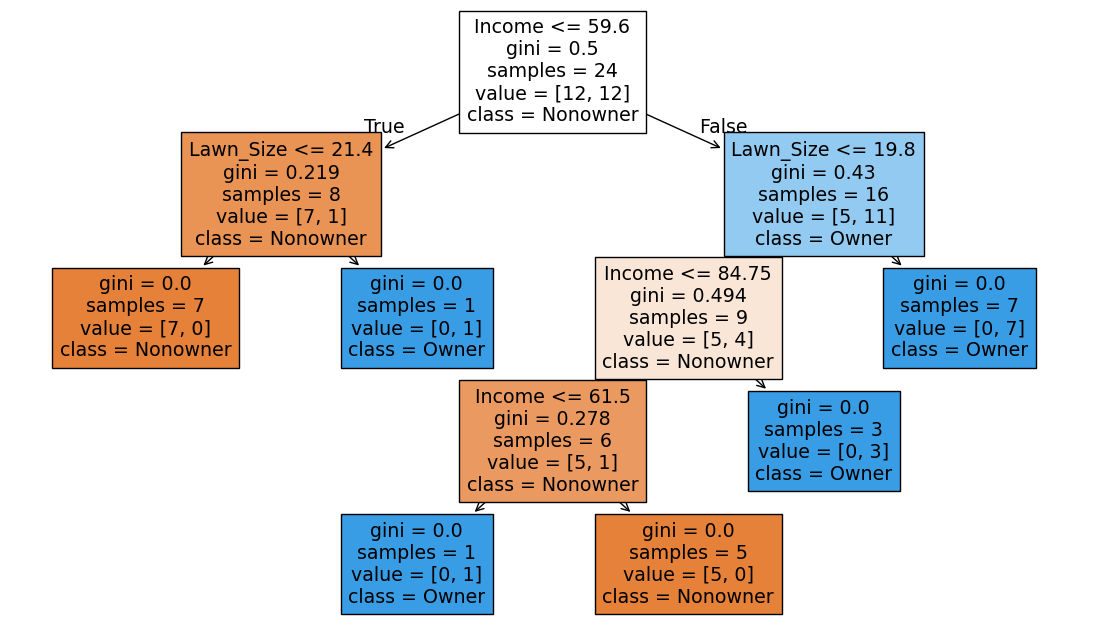

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

data = {
    "Income": [60, 75, 85.5, 52.8, 64.8, 64.8, 61.5, 43.2, 87, 84,
               110.1, 49.2, 108, 59.2, 82.8, 66, 69, 47.4, 93, 33,
               51, 51, 81, 63],
    "Lawn_Size": [18.4, 19.6, 16.8, 20.8, 21.6, 17.2, 20.8, 20.4,
                  23.6, 17.6, 19.2, 17.6, 17.6, 16, 22.4, 18.4,
                  20, 16.4, 20.8, 18.8, 22, 14, 20, 14.8],
    "Decision": ["Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner",
                 "Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner",
                 "Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner",
                 "Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner"]
}

df = pd.DataFrame(data)

le = LabelEncoder()
df["Decision"] = le.fit_transform(df["Decision"])

X = df[["Income", "Lawn_Size"]]
y = df["Decision"]

model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X, y)

plt.figure(figsize=(14, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True
)
plt.show()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Dataset
data = {
    "Income": [60, 75, 85.5, 52.8, 64.8, 64.8, 61.5, 43.2, 87, 84,
               110.1, 49.2, 108, 59.2, 82.8, 66, 69, 47.4, 93, 33,
               51, 51, 81, 63],
    "Lawn_Size": [18.4, 19.6, 16.8, 20.8, 21.6, 17.2, 20.8, 20.4,
                  23.6, 17.6, 19.2, 17.6, 17.6, 16, 22.4, 18.4,
                  20, 16.4, 20.8, 18.8, 22, 14, 20, 14.8],
    "Decision": ["Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner",
                 "Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner",
                 "Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner",
                 "Owner", "Nonowner", "Owner", "Nonowner", "Owner", "Nonowner"]
}

df = pd.DataFrame(data)

# Encode target
le = LabelEncoder()
df["Decision"] = le.fit_transform(df["Decision"])

X = df[["Income", "Lawn_Size"]]
y = df["Decision"]

# Train decision tree
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X, y)

# Access tree structure
tree = model.tree_

print("Node | Depth | Feature | Threshold | Gini | Samples | Value")
print("-" * 70)

def traverse(node, depth):
    feature = tree.feature[node]
    threshold = tree.threshold[node]
    gini = tree.impurity[node]
    samples = tree.n_node_samples[node]
    value = tree.value[node]

    feature_name = X.columns[feature] if feature != -2 else "Leaf"

    print(f"{node:4d} | {depth:5d} | {feature_name:8s} | "
          f"{threshold:9.2f} | {gini:5.3f} | {samples:7d} | {value}")

    if tree.children_left[node] != -1:
        traverse(tree.children_left[node], depth + 1)
        traverse(tree.children_right[node], depth + 1)

# Start traversal from root
traverse(0, 0)


Node | Depth | Feature | Threshold | Gini | Samples | Value
----------------------------------------------------------------------
   0 |     0 | Income   |     59.60 | 0.500 |      24 | [[0.5 0.5]]
   1 |     1 | Lawn_Size |     21.40 | 0.219 |       8 | [[0.875 0.125]]
   2 |     2 | Leaf     |     -2.00 | 0.000 |       7 | [[1. 0.]]
   3 |     2 | Leaf     |     -2.00 | 0.000 |       1 | [[0. 1.]]
   4 |     1 | Lawn_Size |     19.80 | 0.430 |      16 | [[0.3125 0.6875]]
   5 |     2 | Income   |     84.75 | 0.494 |       9 | [[0.55555556 0.44444444]]
   6 |     3 | Income   |     61.50 | 0.278 |       6 | [[0.83333333 0.16666667]]
   7 |     4 | Leaf     |     -2.00 | 0.000 |       1 | [[0. 1.]]
   8 |     4 | Leaf     |     -2.00 | 0.000 |       5 | [[1. 0.]]
   9 |     3 | Leaf     |     -2.00 | 0.000 |       3 | [[0. 1.]]
  10 |     2 | Leaf     |     -2.00 | 0.000 |       7 | [[0. 1.]]
